In [2]:
import pandas as pd

In [19]:
df = pd.read_csv("C:/Users/91902/Downloads/elevate labs/Titanic-Dataset.csv")  

In [20]:
print("Shape of the dataset:", df.shape)

print("\nHead of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

print("\nDescriptive statistics:")
print(df.describe(include='all'))

print("\nData types:")
print(df.dtypes)

Shape of the dataset: (891, 12)

Head of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4

In [21]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1) # Dropping unused columns and columns with too many null values

df['Age'] = df['Age'].fillna(df['Age'].median()) # Filling missing Age with median

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Filling missing Embarked with mode

print("Missing Values After Handling:")
print(df.isnull().sum()) # Confirming there are no missing values

Missing Values After Handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [22]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # Label Encoding for 'Sex' 

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # One-Hot Encoding for 'Embarked'

print("Encoded DataFrame Columns:") # Checking updated DataFrame structure
print(df.columns)
print("\nPreview after encoding:")
print(df.head())

Encoded DataFrame Columns:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

Preview after encoding:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()# Creating scaler instance

num_cols = ['Age', 'Fare', 'SibSp', 'Parch'] # Columns to scale

df[num_cols] = scaler.fit_transform(df[num_cols]) # Applying scaler and replacing in df

print("Scaled Numerical Features:")
print(df[num_cols].head()) # Previewing the scaled columns

Scaled Numerical Features:
        Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674


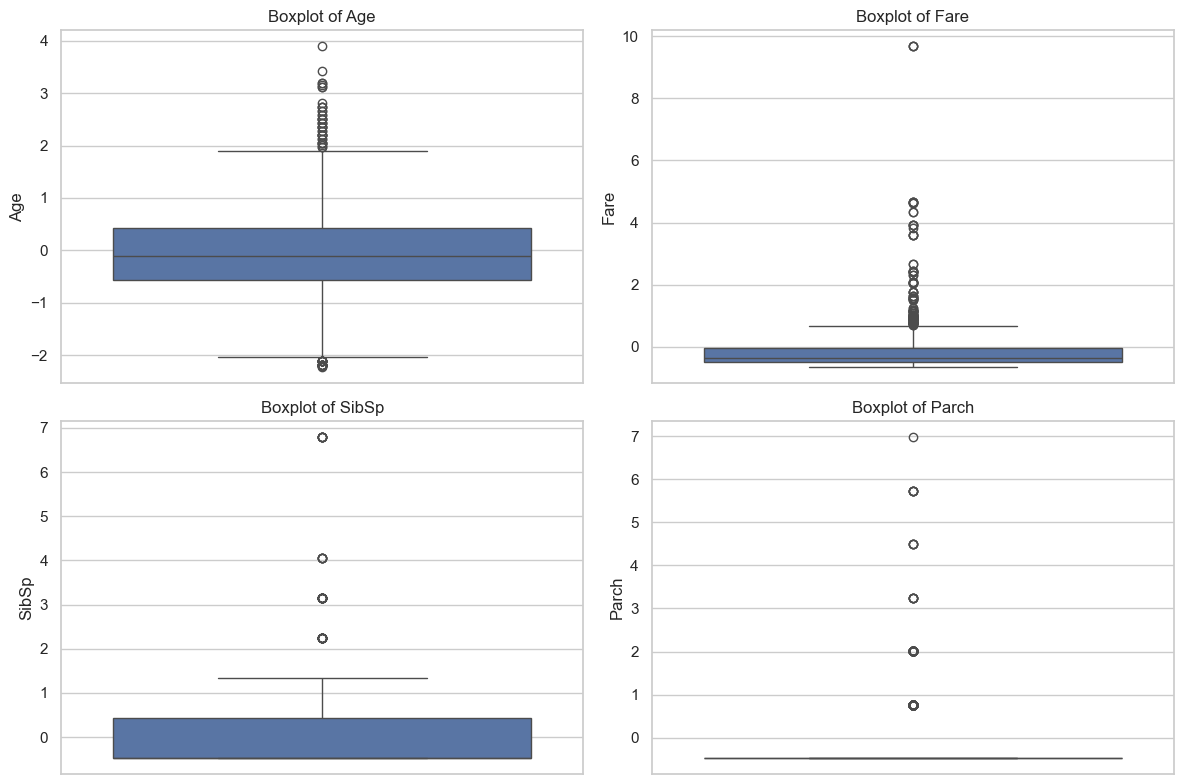

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") # Setting plot style

num_cols = ['Age', 'Fare', 'SibSp', 'Parch'] # Plotting boxplots for all scaled numerical features

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [25]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)] # Function to remove outliers using IQR

for col in num_cols:
    df = remove_outliers_iqr(df, col) # Applying IQR-based outlier removal for each numerical column

print("Shape after removing outliers:", df.shape) # Checking updated shape

Shape after removing outliers: (577, 9)


In [27]:
df.to_csv("Cleaned_Titanic_Dataset.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
